In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

%matplotlib inline
from FITCvsVFE import *

import logging
logging.disable(logging.WARN)

In [2]:
#setup stuff including getting the training data.

tol=1e-11
predict_limits = [-4., 4.]
inducing_points_limits = [-1., 9]
hold_out_limits = [0.20, 0.60]
optimization_limits = [18., 25.]

xtrain, ytrain, xtest, ytest = getTrainingTestData()

In [3]:
#run exact inference on training data.
exact_model = getRegressionModel(xtrain, ytrain)
opt = gpflow.train.ScipyOptimizer(tol=tol)
opt.minimize(exact_model, maxiter=notebook_niter(2000000))

print("Exact model parameters.")
printModelParameters(exact_model)

Exact model parameters.
Likelihood variance  0.0742854751274379 

Kernel variance  0.9004856997582742 

Kernel lengthscale  0.5824997091730746 



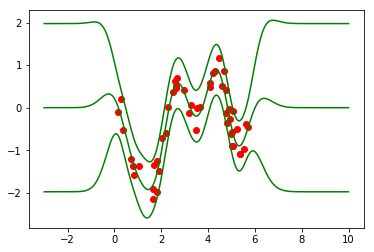

In [4]:
#plot the exact solution and the training data.
figA, axes = plt.subplots(1,1)
axes.plot(xtrain, ytrain, 'ro')
plotPredictions(axes, exact_model, 'g', None)

In [5]:
#Train VFE model initialized from the perfect solution
VFEmodel, VFEcb = trainSparseModel(xtrain, ytrain, exact_model, False, xtest, ytest)
print("Sparse model parameters for VFE optimization \n")
printModelParameters(VFEmodel)

repeatIndex  0
repeatIndex  1
repeatIndex  2
repeatIndex  3
repeatIndex  4
repeatIndex  5
repeatIndex  6
repeatIndex  7
repeatIndex  8
repeatIndex  9
repeatIndex  10
repeatIndex  11
repeatIndex  12
repeatIndex  13
repeatIndex  14
repeatIndex  15
repeatIndex  16
repeatIndex  17
repeatIndex  18
repeatIndex  19
repeatIndex  20
repeatIndex  21
repeatIndex  22
repeatIndex  23
repeatIndex  24
repeatIndex  25
repeatIndex  26
repeatIndex  27
repeatIndex  28
repeatIndex  29
repeatIndex  30
repeatIndex  31
repeatIndex  32
repeatIndex  33
repeatIndex  34
repeatIndex  35
repeatIndex  36
repeatIndex  37
repeatIndex  38
repeatIndex  39
repeatIndex  40
repeatIndex  41
repeatIndex  42
repeatIndex  43
repeatIndex  44
repeatIndex  45
repeatIndex  46
repeatIndex  47
repeatIndex  48
repeatIndex  49
Sparse model parameters for VFE optimization 

Likelihood variance  0.07428600973011681 

Kernel variance  0.9004883873957494 

Kernel lengthscale  0.582500143886745 



In [6]:
#Train FITC model initialized from the perfect solution.
FITCmodel, FITCcb = trainSparseModel(xtrain,ytrain,exact_model,True,xtest,ytest)
print("Sparse model parameters for FITC optimization \n")
printModelParameters(FITCmodel)

repeatIndex  0
repeatIndex  1
repeatIndex  2
repeatIndex  3
repeatIndex  4
repeatIndex  5
repeatIndex  6
repeatIndex  7
repeatIndex  8
repeatIndex  9
repeatIndex  10
repeatIndex  11
repeatIndex  12
repeatIndex  13
repeatIndex  14
repeatIndex  15
repeatIndex  16
repeatIndex  17
repeatIndex  18
repeatIndex  19
repeatIndex  20
repeatIndex  21
repeatIndex  22
repeatIndex  23
repeatIndex  24
repeatIndex  25
repeatIndex  26
repeatIndex  27
repeatIndex  28
repeatIndex  29
repeatIndex  30
repeatIndex  31
repeatIndex  32
repeatIndex  33
repeatIndex  34
repeatIndex  35
repeatIndex  36
repeatIndex  37
repeatIndex  38
repeatIndex  39
repeatIndex  40
repeatIndex  41
repeatIndex  42
repeatIndex  43
repeatIndex  44
repeatIndex  45
repeatIndex  46
repeatIndex  47
repeatIndex  48
repeatIndex  49
Sparse model parameters for FITC optimization 

Likelihood variance  0.019044405873230724 

Kernel variance  1.3400583238808286 

Kernel lengthscale  0.6178972740899767 



Text(0.5,1,'FITC')

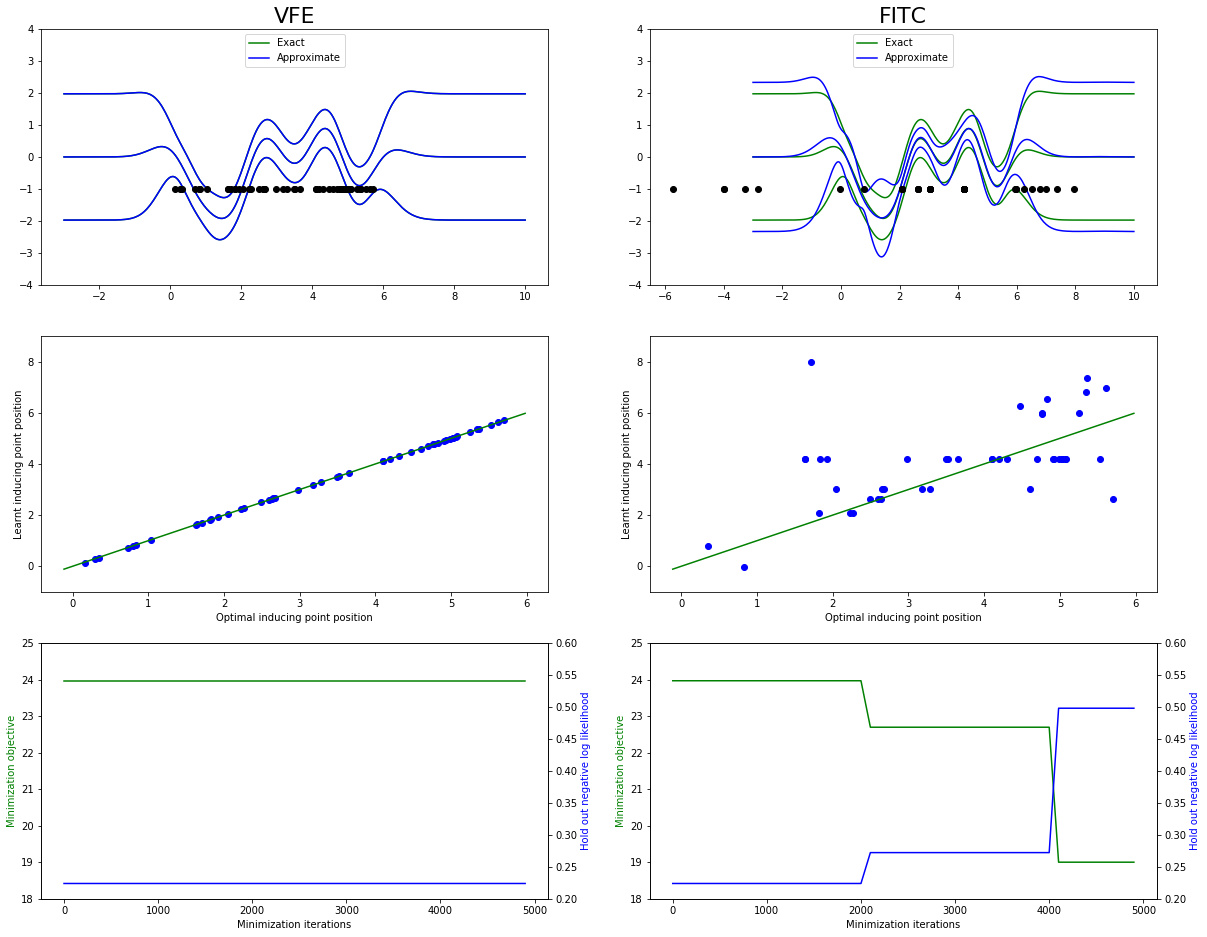

In [7]:
#Plot a comparison of the two algorithms. 
figB, axes = plt.subplots(3,2,figsize=(20, 16))
   
VFEiters = FITCcb.n_iters
VFElog_likelihoods = stretch(len(VFEiters), VFEcb.log_likelihoods)
VFEhold_out_likelihood = stretch( len(VFEiters), VFEcb.hold_out_likelihood)

plotComparisonFigure(xtrain, VFEmodel, exact_model, axes[0,0], axes[1,0], axes[2,0], VFEiters, VFElog_likelihoods.tolist(), VFEhold_out_likelihood.tolist(), "VFE")
plotComparisonFigure(xtrain, FITCmodel, exact_model, axes[0,1], axes[1,1], axes[2,1],FITCcb.n_iters, FITCcb.log_likelihoods, FITCcb.hold_out_likelihood , "FITC")

axes[0,0].set_title('VFE', loc='center', fontdict = {'fontsize': 22})
axes[0,1].set_title('FITC', loc='center', fontdict = {'fontsize': 22})  